## Forecasting TSI with RNN

#### This is a notebook created to analyse some of the TSI (Total Solar Irradiance) forecasting pipeline partial results, and to make tests with different types of Recurrent Neural Networks (RNNs) to forecast TSI. It is being costumized with the purpose to generate results to the work will be submitted to ICCSA2020.

In [1]:
from library import *
#from keras.layers import Masking

Using TensorFlow backend.


Loading the input and the output data provided as results from the function model_

In [2]:
P = np.asarray(np.loadtxt('./partial_output_files/P_PY.csv'))
T = np.asarray(np.loadtxt('./partial_output_files/T_PY.csv'))

In [3]:
T=T.reshape(-1, 1)

In [4]:
# normalize the dataset

scaler = StandardScaler()
#scaler = MinMaxScaler()

P = np.transpose(P)

pn = scaler.fit_transform(P)
tn = scaler.fit_transform(T)

#pn = (P - np.nanmean(P, axis=0))/np.nanstd(P, axis=0) 
#tn = (T - np.nanmean(T))/np.nanstd(T)

In [5]:
#print('\nArquivos salvos em '+path+' :\n')
np.savetxt('./partial_output_files/pn_PY.csv', pn)
#print('pn_PY.csv\n')

np.savetxt('./partial_output_files/tn_PY.csv', tn)
#print('tn_PY.csv\n')

In [15]:
tn[np.where(np.isnan(tn))] = 2
np.max(tn)

2.0

In [7]:
xTrain, xTest, yTrain, yTest= train_test_split(pn, tn, test_size=0.2, shuffle=True)

#xTrain = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1]))
#xTest = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))

#seriesSize = len(tn)

#trainSize = int(seriesSize*0.85)
#testSize = seriesSize - trainSize

#xTrain, xTest = pn[:trainSize,:], pn[trainSize:,:] 
#yTrain, yTest = tn[:trainSize], tn[trainSize:]

xTrain = xTrain.reshape((xTrain.shape[0], 1, xTrain.shape[1]))
xTest = xTest.reshape((xTest.shape[0], 1, xTest.shape[1]))


In [10]:
units = 1
epochs = 200
batch_size=5
dropout=0.1

In [11]:
model = Sequential()
model.add(Masking(mask_value=2, input_shape=(xTrain.shape[1],xTrain.shape[2])))
model.add(LSTM(units=units, input_shape=(xTrain.shape[1],xTrain.shape[2])))
#model.add(Dropout(dropout))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

f = model.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, validation_data=(xTest,yTest))

Train on 469 samples, validate on 118 samples
Epoch 1/200
469/469 [==============================] - 3s 7ms/step - loss: 1.0524 - val_loss: 0.9532
Epoch 2/200
469/469 [==============================] - 0s 810us/step - loss: 1.0285 - val_loss: 0.9415
Epoch 3/200
469/469 [==============================] - 0s 955us/step - loss: 1.0079 - val_loss: 0.9317
Epoch 4/200
469/469 [==============================] - 0s 878us/step - loss: 0.9883 - val_loss: 0.9221
Epoch 5/200
469/469 [==============================] - 0s 852us/step - loss: 0.9676 - val_loss: 0.9113
Epoch 6/200
469/469 [==============================] - 0s 835us/step - loss: 0.9419 - val_loss: 0.8970
Epoch 7/200
469/469 [==============================] - 0s 833us/step - loss: 0.9097 - val_loss: 0.8771
Epoch 8/200
469/469 [==============================] - 0s 825us/step - loss: 0.8692 - val_loss: 0.8459
Epoch 9/200
469/469 [==============================] - 0s 887us/step - loss: 0.8221 - val_loss: 0.8038
Epoch 10/200
469/469 [=======

469/469 [==============================] - 0s 688us/step - loss: 0.1123 - val_loss: 0.0900
Epoch 80/200
469/469 [==============================] - 0s 623us/step - loss: 0.1119 - val_loss: 0.0870
Epoch 81/200
469/469 [==============================] - 0s 680us/step - loss: 0.1120 - val_loss: 0.0890
Epoch 82/200
469/469 [==============================] - 0s 758us/step - loss: 0.1103 - val_loss: 0.0890
Epoch 83/200
469/469 [==============================] - 0s 633us/step - loss: 0.1099 - val_loss: 0.0901
Epoch 84/200
469/469 [==============================] - 0s 709us/step - loss: 0.1098 - val_loss: 0.0922
Epoch 85/200
469/469 [==============================] - 0s 650us/step - loss: 0.1096 - val_loss: 0.0882
Epoch 86/200
469/469 [==============================] - 0s 701us/step - loss: 0.1095 - val_loss: 0.0869
Epoch 87/200
469/469 [==============================] - 0s 643us/step - loss: 0.1080 - val_loss: 0.0853
Epoch 88/200
469/469 [==============================] - 0s 678us/step - loss:

469/469 [==============================] - 0s 660us/step - loss: 0.0823 - val_loss: 0.0742
Epoch 158/200
469/469 [==============================] - 0s 695us/step - loss: 0.0819 - val_loss: 0.0706
Epoch 159/200
469/469 [==============================] - 0s 712us/step - loss: 0.0809 - val_loss: 0.0716
Epoch 160/200
469/469 [==============================] - 0s 622us/step - loss: 0.0816 - val_loss: 0.0717
Epoch 161/200
469/469 [==============================] - 0s 684us/step - loss: 0.0820 - val_loss: 0.0709
Epoch 162/200
469/469 [==============================] - 0s 619us/step - loss: 0.0815 - val_loss: 0.0745
Epoch 163/200
469/469 [==============================] - 0s 688us/step - loss: 0.0815 - val_loss: 0.0737
Epoch 164/200
469/469 [==============================] - 0s 662us/step - loss: 0.0819 - val_loss: 0.0695
Epoch 165/200
469/469 [==============================] - 0s 731us/step - loss: 0.0819 - val_loss: 0.0692
Epoch 166/200
469/469 [==============================] - 0s 672us/ste

In [219]:
mse = []

# for i in range(5,51,5): usado para bacth_size
for i in range(1,20):
    #batch_size = int(trainSize*i/100)
    units = i
    model = Sequential()
    model.add(LSTM(units=units, input_shape=input_shape))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    #model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    f = model.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, validation_data=(xTest,yTest))
    #mse.append([batch_size, f.history['loss'][-1], f.history['val_loss'][-1]])
    mse.append([units, f.history['loss'][-1], f.history['val_loss'][-1]])
    
np.savetxt('LSTMTests\\HiddenUnitsTest_batch_size'+str(batch_size)+'_'+str(epochs)+'epochs.csv',mse)
#np.savetxt('LSTMTests\\batchSizeTest_'+str(epochs)+'epochs.csv',mse)

Train on 95 samples, validate on 24 samples
Epoch 1/300
95/95 [==============================] - 35s 365ms/step - loss: 1.0127 - val_loss: 0.9045
Epoch 2/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9925 - val_loss: 0.9059
Epoch 3/300
95/95 [==============================] - 0s 3ms/step - loss: 0.9993 - val_loss: 0.9070
Epoch 4/300
95/95 [==============================] - 0s 5ms/step - loss: 0.9836 - val_loss: 0.9063
Epoch 5/300
95/95 [==============================] - 0s 5ms/step - loss: 0.9875 - val_loss: 0.9059
Epoch 6/300
95/95 [==============================] - 0s 5ms/step - loss: 0.9753 - val_loss: 0.9055
Epoch 7/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9819 - val_loss: 0.9068
Epoch 8/300
95/95 [==============================] - 0s 5ms/step - loss: 0.9679 - val_loss: 0.9113
Epoch 9/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9833 - val_loss: 0.9102
Epoch 10/300
95/95 [==============================] - 0s 4ms/s

95/95 [==============================] - 0s 4ms/step - loss: 0.4874 - val_loss: 0.6950
Epoch 164/300
95/95 [==============================] - 0s 4ms/step - loss: 0.5519 - val_loss: 0.6961
Epoch 165/300
95/95 [==============================] - 0s 4ms/step - loss: 0.5127 - val_loss: 0.6940
Epoch 166/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4657 - val_loss: 0.6930
Epoch 167/300
95/95 [==============================] - 0s 4ms/step - loss: 0.5843 - val_loss: 0.6935
Epoch 168/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4959 - val_loss: 0.6927
Epoch 169/300
95/95 [==============================] - 0s 4ms/step - loss: 0.6080 - val_loss: 0.6927
Epoch 170/300
95/95 [==============================] - 0s 4ms/step - loss: 0.6220 - val_loss: 0.6933
Epoch 171/300
95/95 [==============================] - 0s 4ms/step - loss: 0.5080 - val_loss: 0.6913
Epoch 172/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4576 - val_loss: 0.6879
Epoc

95/95 [==============================] - 0s 2ms/step - loss: 0.8514 - val_loss: 0.8830
Epoch 26/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8252 - val_loss: 0.8861
Epoch 27/300
95/95 [==============================] - 0s 2ms/step - loss: 0.8166 - val_loss: 0.8854
Epoch 28/300
95/95 [==============================] - 0s 3ms/step - loss: 0.8234 - val_loss: 0.8703
Epoch 29/300
95/95 [==============================] - 0s 2ms/step - loss: 0.7965 - val_loss: 0.8664
Epoch 30/300
95/95 [==============================] - 0s 2ms/step - loss: 0.7876 - val_loss: 0.8588
Epoch 31/300
95/95 [==============================] - 0s 4ms/step - loss: 0.8022 - val_loss: 0.8561
Epoch 32/300
95/95 [==============================] - 0s 2ms/step - loss: 0.7992 - val_loss: 0.8466
Epoch 33/300
95/95 [==============================] - 0s 2ms/step - loss: 0.7504 - val_loss: 0.8471
Epoch 34/300
95/95 [==============================] - 0s 2ms/step - loss: 0.7999 - val_loss: 0.8334
Epoch 35/300


Epoch 107/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4769 - val_loss: 0.6050
Epoch 108/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4542 - val_loss: 0.6152
Epoch 109/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4706 - val_loss: 0.5972
Epoch 110/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4913 - val_loss: 0.5875
Epoch 111/300
95/95 [==============================] - 0s 3ms/step - loss: 0.4912 - val_loss: 0.5924
Epoch 112/300
95/95 [==============================] - 0s 3ms/step - loss: 0.4128 - val_loss: 0.5994
Epoch 113/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4840 - val_loss: 0.5852
Epoch 114/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5018 - val_loss: 0.6008
Epoch 115/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4506 - val_loss: 0.6005
Epoch 116/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4592 - val_los

95/95 [==============================] - 0s 2ms/step - loss: 0.3480 - val_loss: 0.4665
Epoch 189/300
95/95 [==============================] - 0s 2ms/step - loss: 0.2744 - val_loss: 0.4630
Epoch 190/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3175 - val_loss: 0.4542
Epoch 191/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4288 - val_loss: 0.4672
Epoch 192/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3489 - val_loss: 0.4704
Epoch 193/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3733 - val_loss: 0.4689
Epoch 194/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3732 - val_loss: 0.4615
Epoch 195/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3908 - val_loss: 0.4444
Epoch 196/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3916 - val_loss: 0.4559
Epoch 197/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3378 - val_loss: 0.4726
Epoc

95/95 [==============================] - 0s 4ms/step - loss: 0.3574 - val_loss: 0.4518
Epoch 51/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3311 - val_loss: 0.4609
Epoch 52/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3109 - val_loss: 0.4085
Epoch 53/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3512 - val_loss: 0.4350
Epoch 54/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3455 - val_loss: 0.4005
Epoch 55/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3636 - val_loss: 0.4033
Epoch 56/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3387 - val_loss: 0.4362
Epoch 57/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3265 - val_loss: 0.3898
Epoch 58/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3154 - val_loss: 0.4367
Epoch 59/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2878 - val_loss: 0.3548
Epoch 60/300


95/95 [==============================] - 0s 4ms/step - loss: 0.1083 - val_loss: 0.0717
Epoch 213/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0635 - val_loss: 0.0864
Epoch 214/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1130 - val_loss: 0.0768
Epoch 215/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0988 - val_loss: 0.0854
Epoch 216/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0764 - val_loss: 0.0849
Epoch 217/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1021 - val_loss: 0.0790
Epoch 218/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0841 - val_loss: 0.0793
Epoch 219/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1349 - val_loss: 0.1142
Epoch 220/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1418 - val_loss: 0.0786
Epoch 221/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1016 - val_loss: 0.0748
Epoc

95/95 [==============================] - 0s 5ms/step - loss: 0.2135 - val_loss: 0.3514
Epoch 75/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1910 - val_loss: 0.3800
Epoch 76/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2183 - val_loss: 0.3460
Epoch 77/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2135 - val_loss: 0.3403
Epoch 78/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2518 - val_loss: 0.3536
Epoch 79/300
95/95 [==============================] - 0s 5ms/step - loss: 0.2542 - val_loss: 0.3473
Epoch 80/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2240 - val_loss: 0.3415
Epoch 81/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2323 - val_loss: 0.3264
Epoch 82/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2144 - val_loss: 0.3376
Epoch 83/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2528 - val_loss: 0.3240
Epoch 84/300


95/95 [==============================] - 1s 7ms/step - loss: 0.0586 - val_loss: 0.0921
Epoch 237/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0776 - val_loss: 0.0827
Epoch 238/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0735 - val_loss: 0.0862
Epoch 239/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0891 - val_loss: 0.0885
Epoch 240/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0713 - val_loss: 0.0823
Epoch 241/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0892 - val_loss: 0.0854
Epoch 242/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0849 - val_loss: 0.0855
Epoch 243/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0902 - val_loss: 0.0881
Epoch 244/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0805 - val_loss: 0.0842
Epoch 245/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0827 - val_loss: 0.0874
Epoc

95/95 [==============================] - 0s 2ms/step - loss: 0.7447 - val_loss: 0.7355
Epoch 18/300
95/95 [==============================] - 0s 1ms/step - loss: 0.6729 - val_loss: 0.7452
Epoch 19/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6843 - val_loss: 0.7172
Epoch 20/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6707 - val_loss: 0.7201
Epoch 21/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6049 - val_loss: 0.7048
Epoch 22/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6345 - val_loss: 0.6893
Epoch 23/300
95/95 [==============================] - 0s 1ms/step - loss: 0.6295 - val_loss: 0.7056
Epoch 24/300
95/95 [==============================] - 0s 1ms/step - loss: 0.5991 - val_loss: 0.6677
Epoch 25/300
95/95 [==============================] - 0s 2ms/step - loss: 0.6118 - val_loss: 0.6517
Epoch 26/300
95/95 [==============================] - 0s 2ms/step - loss: 0.5830 - val_loss: 0.6527
Epoch 27/300


95/95 [==============================] - 0s 2ms/step - loss: 0.1291 - val_loss: 0.1640
Epoch 100/300
95/95 [==============================] - 0s 1ms/step - loss: 0.1516 - val_loss: 0.1718
Epoch 101/300
95/95 [==============================] - 0s 1ms/step - loss: 0.1547 - val_loss: 0.1838
Epoch 102/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1397 - val_loss: 0.1835
Epoch 103/300
95/95 [==============================] - 0s 1ms/step - loss: 0.1265 - val_loss: 0.1631
Epoch 104/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1452 - val_loss: 0.1835
Epoch 105/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1158 - val_loss: 0.1606
Epoch 106/300
95/95 [==============================] - 0s 1ms/step - loss: 0.1402 - val_loss: 0.1807
Epoch 107/300
95/95 [==============================] - 0s 1ms/step - loss: 0.1498 - val_loss: 0.1503
Epoch 108/300
95/95 [==============================] - 0s 1ms/step - loss: 0.1612 - val_loss: 0.1455
Epoc

95/95 [==============================] - 1s 6ms/step - loss: 0.0469 - val_loss: 0.0651
Epoch 262/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0771 - val_loss: 0.0637
Epoch 263/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0783 - val_loss: 0.0610
Epoch 264/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0710 - val_loss: 0.0667
Epoch 265/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0583 - val_loss: 0.0678
Epoch 266/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0677 - val_loss: 0.0692
Epoch 267/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 0.0661
Epoch 268/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0482 - val_loss: 0.0742
Epoch 269/300
95/95 [==============================] - 1s 6ms/step - loss: 0.0628 - val_loss: 0.0640
Epoch 270/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0578 - val_loss: 0.0649
Epoc

Epoch 124/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0805 - val_loss: 0.0974
Epoch 125/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0782 - val_loss: 0.0923
Epoch 126/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0797 - val_loss: 0.0945
Epoch 127/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1007 - val_loss: 0.0878
Epoch 128/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0804 - val_loss: 0.1049
Epoch 129/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0851 - val_loss: 0.0934
Epoch 130/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0975 - val_loss: 0.0834
Epoch 131/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 0.0946
Epoch 132/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 0.0889
Epoch 133/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0953 - val_los

Epoch 205/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0647 - val_loss: 0.0600
Epoch 206/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0550 - val_loss: 0.0648
Epoch 207/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0597 - val_loss: 0.0642
Epoch 208/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0494 - val_loss: 0.0665
Epoch 209/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0445 - val_loss: 0.0732
Epoch 210/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0498 - val_loss: 0.0658
Epoch 211/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0764 - val_loss: 0.0680
Epoch 212/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0642 - val_loss: 0.0914
Epoch 213/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0585 - val_loss: 0.0574
Epoch 214/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0472 - val_los

95/95 [==============================] - 0s 5ms/step - loss: 0.0522 - val_loss: 0.0546
Epoch 287/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0739 - val_loss: 0.0521
Epoch 288/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0495 - val_loss: 0.0538
Epoch 289/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0490 - val_loss: 0.0474
Epoch 290/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0440 - val_loss: 0.0605
Epoch 291/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0486 - val_loss: 0.0577
Epoch 292/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0408 - val_loss: 0.0610
Epoch 293/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.0525
Epoch 294/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0463 - val_loss: 0.0530
Epoch 295/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0361 - val_loss: 0.0502
Epoc

95/95 [==============================] - 0s 5ms/step - loss: 0.0795 - val_loss: 0.1206
Epoch 149/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0916 - val_loss: 0.1353
Epoch 150/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1049 - val_loss: 0.1314
Epoch 151/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0826 - val_loss: 0.1154
Epoch 152/300
95/95 [==============================] - 1s 6ms/step - loss: 0.0675 - val_loss: 0.1186
Epoch 153/300
95/95 [==============================] - 1s 5ms/step - loss: 0.0914 - val_loss: 0.1394
Epoch 154/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1028 - val_loss: 0.1146
Epoch 155/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0885 - val_loss: 0.1176
Epoch 156/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0751 - val_loss: 0.1294
Epoch 157/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0854 - val_loss: 0.1063
Epoc

Epoch 10/300
95/95 [==============================] - 0s 5ms/step - loss: 0.8095 - val_loss: 0.7851
Epoch 11/300
95/95 [==============================] - 1s 6ms/step - loss: 0.7513 - val_loss: 0.8039
Epoch 12/300
95/95 [==============================] - 0s 5ms/step - loss: 0.7523 - val_loss: 0.7730
Epoch 13/300
95/95 [==============================] - 0s 5ms/step - loss: 0.6652 - val_loss: 0.7920
Epoch 14/300
95/95 [==============================] - 0s 4ms/step - loss: 0.6824 - val_loss: 0.7714
Epoch 15/300
95/95 [==============================] - 0s 4ms/step - loss: 0.6649 - val_loss: 0.6874
Epoch 16/300
95/95 [==============================] - 0s 5ms/step - loss: 0.6209 - val_loss: 0.7224
Epoch 17/300
95/95 [==============================] - 0s 5ms/step - loss: 0.5677 - val_loss: 0.6911
Epoch 18/300
95/95 [==============================] - 0s 4ms/step - loss: 0.5916 - val_loss: 0.6847
Epoch 19/300
95/95 [==============================] - 0s 5ms/step - loss: 0.5782 - val_loss: 0.6601


Epoch 92/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1377 - val_loss: 0.2031
Epoch 93/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1543 - val_loss: 0.2385
Epoch 94/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1335 - val_loss: 0.2147
Epoch 95/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1399 - val_loss: 0.2264
Epoch 96/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1446 - val_loss: 0.2061
Epoch 97/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1309 - val_loss: 0.2082
Epoch 98/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1460 - val_loss: 0.2068
Epoch 99/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1221 - val_loss: 0.2112
Epoch 100/300
95/95 [==============================] - 1s 6ms/step - loss: 0.1652 - val_loss: 0.2013
Epoch 101/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1100 - val_loss: 0.218

95/95 [==============================] - 0s 4ms/step - loss: 0.0517 - val_loss: 0.0716
Epoch 255/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0436 - val_loss: 0.0695
Epoch 256/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.0844
Epoch 257/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0430 - val_loss: 0.0703
Epoch 258/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0514 - val_loss: 0.0795
Epoch 259/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0799
Epoch 260/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0707 - val_loss: 0.0734
Epoch 261/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0379 - val_loss: 0.0726
Epoch 262/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0521 - val_loss: 0.0742
Epoch 263/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0517 - val_loss: 0.0729
Epoc

Epoch 117/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0935 - val_loss: 0.1006
Epoch 118/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0669 - val_loss: 0.0934
Epoch 119/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0670 - val_loss: 0.0736
Epoch 120/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0714 - val_loss: 0.0717
Epoch 121/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0963 - val_loss: 0.0768
Epoch 122/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0631 - val_loss: 0.0699
Epoch 123/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0594 - val_loss: 0.0689
Epoch 124/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0604 - val_loss: 0.0752
Epoch 125/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0786 - val_loss: 0.0692
Epoch 126/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0564 - val_los

95/95 [==============================] - 0s 4ms/step - loss: 0.0604 - val_loss: 0.0566
Epoch 199/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0472 - val_loss: 0.0563
Epoch 200/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0442 - val_loss: 0.0570
Epoch 201/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0500 - val_loss: 0.0573
Epoch 202/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0555 - val_loss: 0.0606
Epoch 203/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0510 - val_loss: 0.0547
Epoch 204/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0592 - val_loss: 0.0575
Epoch 205/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0602 - val_loss: 0.0558
Epoch 206/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0524 - val_loss: 0.0606
Epoch 207/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0419 - val_loss: 0.0540
Epoc

95/95 [==============================] - 0s 4ms/step - loss: 0.1674 - val_loss: 0.1849
Epoch 61/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1406 - val_loss: 0.2034
Epoch 62/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1693 - val_loss: 0.1919
Epoch 63/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1637 - val_loss: 0.1630
Epoch 64/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1317 - val_loss: 0.1839
Epoch 65/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1338 - val_loss: 0.1775
Epoch 66/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1294 - val_loss: 0.1969
Epoch 67/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1342 - val_loss: 0.1647
Epoch 68/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1389 - val_loss: 0.1453
Epoch 69/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1336 - val_loss: 0.1702
Epoch 70/300


95/95 [==============================] - 0s 4ms/step - loss: 0.0464 - val_loss: 0.0530
Epoch 223/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.0493
Epoch 224/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0539 - val_loss: 0.0461
Epoch 225/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0321 - val_loss: 0.0441
Epoch 226/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0449 - val_loss: 0.0516
Epoch 227/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0427 - val_loss: 0.0586
Epoch 228/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0506 - val_loss: 0.0585
Epoch 229/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0557 - val_loss: 0.0568
Epoch 230/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0361 - val_loss: 0.0462
Epoch 231/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0512
Epoc

Epoch 3/300
95/95 [==============================] - 0s 5ms/step - loss: 0.9483 - val_loss: 0.9485
Epoch 4/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9594 - val_loss: 0.9563
Epoch 5/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9419 - val_loss: 0.9186
Epoch 6/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9251 - val_loss: 0.9022
Epoch 7/300
95/95 [==============================] - 0s 4ms/step - loss: 0.8858 - val_loss: 0.9128
Epoch 8/300
95/95 [==============================] - 0s 4ms/step - loss: 0.8663 - val_loss: 0.8802
Epoch 9/300
95/95 [==============================] - 0s 4ms/step - loss: 0.8305 - val_loss: 0.8699
Epoch 10/300
95/95 [==============================] - 0s 4ms/step - loss: 0.7764 - val_loss: 0.8475
Epoch 11/300
95/95 [==============================] - 0s 3ms/step - loss: 0.7830 - val_loss: 0.8362
Epoch 12/300
95/95 [==============================] - 0s 4ms/step - loss: 0.7262 - val_loss: 0.8027
Epoch 1

Epoch 85/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 0.1198
Epoch 86/300
95/95 [==============================] - 1s 7ms/step - loss: 0.1085 - val_loss: 0.1389
Epoch 87/300
95/95 [==============================] - 1s 7ms/step - loss: 0.1080 - val_loss: 0.1122
Epoch 88/300
95/95 [==============================] - 1s 6ms/step - loss: 0.1028 - val_loss: 0.1737
Epoch 89/300
95/95 [==============================] - 1s 7ms/step - loss: 0.0925 - val_loss: 0.1301
Epoch 90/300
95/95 [==============================] - 1s 6ms/step - loss: 0.1027 - val_loss: 0.1187
Epoch 91/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0801 - val_loss: 0.1056
Epoch 92/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0993 - val_loss: 0.1003
Epoch 93/300
95/95 [==============================] - 1s 5ms/step - loss: 0.1026 - val_loss: 0.1245
Epoch 94/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0945 - val_loss: 0.1057


95/95 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.0510
Epoch 248/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0417 - val_loss: 0.0534
Epoch 249/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0435 - val_loss: 0.0479
Epoch 250/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0473
Epoch 251/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0492 - val_loss: 0.0485
Epoch 252/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0366 - val_loss: 0.0489
Epoch 253/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0423 - val_loss: 0.0494
Epoch 254/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0356 - val_loss: 0.0428
Epoch 255/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0463 - val_loss: 0.0511
Epoch 256/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0349 - val_loss: 0.0554
Epoc

Epoch 110/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0858 - val_loss: 0.1193
Epoch 111/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1053 - val_loss: 0.1180
Epoch 112/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0967 - val_loss: 0.1066
Epoch 113/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0919 - val_loss: 0.1323
Epoch 114/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0791 - val_loss: 0.1049
Epoch 115/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0799 - val_loss: 0.1127
Epoch 116/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0835 - val_loss: 0.1140
Epoch 117/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0908 - val_loss: 0.0896
Epoch 118/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0794 - val_loss: 0.1020
Epoch 119/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0848 - val_los

95/95 [==============================] - 0s 4ms/step - loss: 0.0750 - val_loss: 0.0633
Epoch 192/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0516 - val_loss: 0.0721
Epoch 193/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0615 - val_loss: 0.0830
Epoch 194/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0614 - val_loss: 0.0622
Epoch 195/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0476 - val_loss: 0.0801
Epoch 196/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0454 - val_loss: 0.0698
Epoch 197/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0575 - val_loss: 0.0659
Epoch 198/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.0603
Epoch 199/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0671 - val_loss: 0.0883
Epoch 200/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0519 - val_loss: 0.0720
Epoc

95/95 [==============================] - 1s 7ms/step - loss: 0.1265 - val_loss: 0.1991
Epoch 54/300
95/95 [==============================] - 1s 8ms/step - loss: 0.1299 - val_loss: 0.1567
Epoch 55/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1203 - val_loss: 0.1388
Epoch 56/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1320 - val_loss: 0.1376
Epoch 57/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1106 - val_loss: 0.2230
Epoch 58/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1473 - val_loss: 0.1392
Epoch 59/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1068 - val_loss: 0.1463
Epoch 60/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1284 - val_loss: 0.1658
Epoch 61/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1237 - val_loss: 0.1865
Epoch 62/300
95/95 [==============================] - 1s 5ms/step - loss: 0.1444 - val_loss: 0.1918
Epoch 63/300


95/95 [==============================] - 1s 7ms/step - loss: 0.0398 - val_loss: 0.0504
Epoch 216/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0437 - val_loss: 0.0473
Epoch 217/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0415 - val_loss: 0.0452
Epoch 218/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0474 - val_loss: 0.0435
Epoch 219/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0363 - val_loss: 0.0471
Epoch 220/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0433 - val_loss: 0.0520
Epoch 221/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0321 - val_loss: 0.0543
Epoch 222/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0317 - val_loss: 0.0489
Epoch 223/300
95/95 [==============================] - ETA: 0s - loss: 0.035 - 0s 3ms/step - loss: 0.0345 - val_loss: 0.0451
Epoch 224/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0312

95/95 [==============================] - 0s 5ms/step - loss: 0.0248 - val_loss: 0.0405
Epoch 297/300
95/95 [==============================] - 1s 7ms/step - loss: 0.0312 - val_loss: 0.0357
Epoch 298/300
95/95 [==============================] - 1s 8ms/step - loss: 0.0263 - val_loss: 0.0405
Epoch 299/300
95/95 [==============================] - 1s 6ms/step - loss: 0.0296 - val_loss: 0.0397
Epoch 300/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0315 - val_loss: 0.0405
Train on 95 samples, validate on 24 samples
Epoch 1/300
95/95 [==============================] - 46s 484ms/step - loss: 1.0694 - val_loss: 1.0520
Epoch 2/300
95/95 [==============================] - 0s 4ms/step - loss: 1.0110 - val_loss: 0.9980
Epoch 3/300
95/95 [==============================] - 0s 5ms/step - loss: 0.9764 - val_loss: 0.9847
Epoch 4/300
95/95 [==============================] - 0s 4ms/step - loss: 0.9585 - val_loss: 0.9402
Epoch 5/300
95/95 [==============================] - 0s 4ms/step -

95/95 [==============================] - 0s 4ms/step - loss: 0.0460 - val_loss: 0.0566
Epoch 159/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0606 - val_loss: 0.0539
Epoch 160/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0643 - val_loss: 0.0736
Epoch 161/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0757 - val_loss: 0.0525
Epoch 162/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0562 - val_loss: 0.0594
Epoch 163/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0527 - val_loss: 0.0577
Epoch 164/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0622 - val_loss: 0.0554
Epoch 165/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0538 - val_loss: 0.0514
Epoch 166/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0533 - val_loss: 0.0529
Epoch 167/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0523 - val_loss: 0.0526
Epoc

95/95 [==============================] - 1s 6ms/step - loss: 0.4791 - val_loss: 0.4936
Epoch 21/300
95/95 [==============================] - 1s 5ms/step - loss: 0.4295 - val_loss: 0.5104
Epoch 22/300
95/95 [==============================] - 1s 6ms/step - loss: 0.4020 - val_loss: 0.4810
Epoch 23/300
95/95 [==============================] - 1s 7ms/step - loss: 0.3737 - val_loss: 0.4656
Epoch 24/300
95/95 [==============================] - 1s 6ms/step - loss: 0.3873 - val_loss: 0.4606
Epoch 25/300
95/95 [==============================] - 1s 5ms/step - loss: 0.4086 - val_loss: 0.4207
Epoch 26/300
95/95 [==============================] - 0s 5ms/step - loss: 0.3277 - val_loss: 0.3994
Epoch 27/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3566 - val_loss: 0.4428
Epoch 28/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3324 - val_loss: 0.3990
Epoch 29/300
95/95 [==============================] - 0s 4ms/step - loss: 0.3065 - val_loss: 0.3578
Epoch 30/300


95/95 [==============================] - 0s 4ms/step - loss: 0.0732 - val_loss: 0.0935
Epoch 103/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0925 - val_loss: 0.0890
Epoch 104/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0811 - val_loss: 0.0970
Epoch 105/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0611 - val_loss: 0.0818
Epoch 106/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0614 - val_loss: 0.0832
Epoch 107/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0842 - val_loss: 0.0879
Epoch 108/300
95/95 [==============================] - 1s 6ms/step - loss: 0.0674 - val_loss: 0.1011
Epoch 109/300
95/95 [==============================] - 1s 8ms/step - loss: 0.0775 - val_loss: 0.0838
Epoch 110/300
95/95 [==============================] - 1s 7ms/step - loss: 0.0609 - val_loss: 0.0970
Epoch 111/300
95/95 [==============================] - 1s 8ms/step - loss: 0.0797 - val_loss: 0.0743
Epoc

95/95 [==============================] - 0s 4ms/step - loss: 0.0431 - val_loss: 0.0496
Epoch 184/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0485 - val_loss: 0.0597
Epoch 185/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0456 - val_loss: 0.0499
Epoch 186/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0425 - val_loss: 0.0613
Epoch 187/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0436 - val_loss: 0.0509
Epoch 188/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.0509
Epoch 189/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0354 - val_loss: 0.0497
Epoch 190/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0472 - val_loss: 0.0502
Epoch 191/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0316 - val_loss: 0.0509
Epoch 192/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0391 - val_loss: 0.0463
Epoc

Epoch 45/300
95/95 [==============================] - 0s 4ms/step - loss: 0.2007 - val_loss: 0.3359
Epoch 46/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1765 - val_loss: 0.2975
Epoch 47/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1800 - val_loss: 0.2731
Epoch 48/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1929 - val_loss: 0.3141
Epoch 49/300
95/95 [==============================] - 1s 6ms/step - loss: 0.1846 - val_loss: 0.3065
Epoch 50/300
95/95 [==============================] - 1s 5ms/step - loss: 0.1913 - val_loss: 0.2473
Epoch 51/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1709 - val_loss: 0.2549
Epoch 52/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1631 - val_loss: 0.2666
Epoch 53/300
95/95 [==============================] - 0s 4ms/step - loss: 0.1635 - val_loss: 0.2415
Epoch 54/300
95/95 [==============================] - 0s 5ms/step - loss: 0.1537 - val_loss: 0.2988


95/95 [==============================] - 1s 7ms/step - loss: 0.0331 - val_loss: 0.0514
Epoch 208/300
95/95 [==============================] - 1s 6ms/step - loss: 0.0437 - val_loss: 0.0453
Epoch 209/300
95/95 [==============================] - 1s 6ms/step - loss: 0.0421 - val_loss: 0.0485
Epoch 210/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0773
Epoch 211/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0445 - val_loss: 0.0501
Epoch 212/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0307 - val_loss: 0.0695
Epoch 213/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0289 - val_loss: 0.0489
Epoch 214/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0359 - val_loss: 0.0538
Epoch 215/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0394 - val_loss: 0.0537
Epoch 216/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.0490
Epoc

95/95 [==============================] - 0s 4ms/step - loss: 0.0261 - val_loss: 0.0466
Epoch 289/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0251 - val_loss: 0.0446
Epoch 290/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0360 - val_loss: 0.0477
Epoch 291/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0266 - val_loss: 0.0526
Epoch 292/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0217 - val_loss: 0.0482
Epoch 293/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.0441
Epoch 294/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0313 - val_loss: 0.0450
Epoch 295/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0247 - val_loss: 0.0454
Epoch 296/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0290 - val_loss: 0.0476
Epoch 297/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0276 - val_loss: 0.0441
Epoc

95/95 [==============================] - 0s 5ms/step - loss: 0.0646 - val_loss: 0.0720
Epoch 151/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0774 - val_loss: 0.0660
Epoch 152/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0767 - val_loss: 0.0641
Epoch 153/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0658 - val_loss: 0.0726
Epoch 154/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0501 - val_loss: 0.0716
Epoch 155/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0579 - val_loss: 0.0678
Epoch 156/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0652 - val_loss: 0.0683
Epoch 157/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0724 - val_loss: 0.0658
Epoch 158/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0563 - val_loss: 0.0698
Epoch 159/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0475 - val_loss: 0.0719
Epoc

Epoch 12/300
95/95 [==============================] - 0s 4ms/step - loss: 0.6401 - val_loss: 0.6918
Epoch 13/300
95/95 [==============================] - 0s 4ms/step - loss: 0.6330 - val_loss: 0.6236
Epoch 14/300
95/95 [==============================] - 1s 5ms/step - loss: 0.5750 - val_loss: 0.6416 - ETA: 0s - loss: 0.592
Epoch 15/300
95/95 [==============================] - 0s 4ms/step - loss: 0.5596 - val_loss: 0.5943
Epoch 16/300
95/95 [==============================] - 0s 4ms/step - loss: 0.5725 - val_loss: 0.6045
Epoch 17/300
95/95 [==============================] - 0s 4ms/step - loss: 0.5177 - val_loss: 0.6138
Epoch 18/300
95/95 [==============================] - 0s 5ms/step - loss: 0.4813 - val_loss: 0.5502
Epoch 19/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4613 - val_loss: 0.5280
Epoch 20/300
95/95 [==============================] - 0s 4ms/step - loss: 0.4425 - val_loss: 0.5374
Epoch 21/300
95/95 [==============================] - 0s 4ms/step - loss: 0.

95/95 [==============================] - 1s 9ms/step - loss: 0.0491 - val_loss: 0.0597
Epoch 175/300
95/95 [==============================] - 1s 7ms/step - loss: 0.0396 - val_loss: 0.0609
Epoch 176/300
95/95 [==============================] - 3s 33ms/step - loss: 0.0532 - val_loss: 0.0564
Epoch 177/300
55/95 [================>.............] - ETA: 0s - loss: 0.0347

C:\Users\Ami\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (1.111364). Check your callbacks.
  % delta_t_median)
C:\Users\Ami\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.557181). Check your callbacks.
  % delta_t_median)


95/95 [==============================] - 2s 16ms/step - loss: 0.0325 - val_loss: 0.0536
Epoch 178/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0443 - val_loss: 0.0527
Epoch 179/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0364 - val_loss: 0.0537
Epoch 180/300
95/95 [==============================] - 0s 3ms/step - loss: 0.0448 - val_loss: 0.0561
Epoch 181/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0433 - val_loss: 0.0673
Epoch 182/300
95/95 [==============================] - 2s 17ms/step - loss: 0.0345 - val_loss: 0.0638
Epoch 183/300
95/95 [==============================] - 2s 22ms/step - loss: 0.0325 - val_loss: 0.0624
Epoch 184/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0336 - val_loss: 0.0608
Epoch 185/300
95/95 [==============================] - 4s 41ms/step - loss: 0.0352 - val_loss: 0.0578
Epoch 186/300
95/95 [==============================] - 1s 9ms/step - loss: 0.0349 - val_loss: 0.0672


95/95 [==============================] - 0s 5ms/step - loss: 0.0288 - val_loss: 0.0596
Epoch 259/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0239 - val_loss: 0.0587
Epoch 260/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0371 - val_loss: 0.0476
Epoch 261/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0425 - val_loss: 0.0483
Epoch 262/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0370 - val_loss: 0.0561
Epoch 263/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0391 - val_loss: 0.0476
Epoch 264/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0246 - val_loss: 0.0515
Epoch 265/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0219 - val_loss: 0.0515
Epoch 266/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0282 - val_loss: 0.0477
Epoch 267/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0324 - val_loss: 0.0508
Epoc

95/95 [==============================] - 0s 5ms/step - loss: 0.0440 - val_loss: 0.0724
Epoch 119/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0536 - val_loss: 0.0703
Epoch 120/300
95/95 [==============================] - 1s 7ms/step - loss: 0.0414 - val_loss: 0.0722
Epoch 121/300
95/95 [==============================] - 1s 5ms/step - loss: 0.0432 - val_loss: 0.0745
Epoch 122/300
95/95 [==============================] - 1s 5ms/step - loss: 0.0611 - val_loss: 0.0907
Epoch 123/300
95/95 [==============================] - 1s 6ms/step - loss: 0.0556 - val_loss: 0.1123
Epoch 124/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0559 - val_loss: 0.0929
Epoch 125/300
95/95 [==============================] - 1s 6ms/step - loss: 0.0476 - val_loss: 0.1121
Epoch 126/300
95/95 [==============================] - 1s 8ms/step - loss: 0.0481 - val_loss: 0.0761
Epoch 127/300
95/95 [==============================] - 1s 9ms/step - loss: 0.0593 - val_loss: 0.0727
Epoc

Epoch 199/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0262 - val_loss: 0.0577
Epoch 200/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0380 - val_loss: 0.0545
Epoch 201/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0318 - val_loss: 0.0565
Epoch 202/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0243 - val_loss: 0.0592
Epoch 203/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0323 - val_loss: 0.0518
Epoch 204/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.0603
Epoch 205/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.0530
Epoch 206/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.0555
Epoch 207/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0374 - val_loss: 0.0666
Epoch 208/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0304 - val_los

95/95 [==============================] - 0s 4ms/step - loss: 0.0310 - val_loss: 0.0572
Epoch 281/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0222 - val_loss: 0.0542
Epoch 282/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0330 - val_loss: 0.0587
Epoch 283/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0222 - val_loss: 0.0523
Epoch 284/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0187 - val_loss: 0.0560
Epoch 285/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0310 - val_loss: 0.0516
Epoch 286/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0324 - val_loss: 0.0588
Epoch 287/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0272 - val_loss: 0.0597
Epoch 288/300
95/95 [==============================] - 0s 5ms/step - loss: 0.0309 - val_loss: 0.0574
Epoch 289/300
95/95 [==============================] - 0s 4ms/step - loss: 0.0242 - val_loss: 0.0544
Epoc

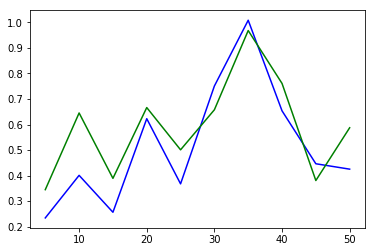

In [210]:
mse = np.asarray(mse)
plt.figure()
plt.plot(mse[:,0],mse[:,1],'b-',mse[:,0],mse[:,2],'g-')

In [12]:
# make predictions
trainPredictedY = model.predict(xTrain)
testPredictedY = model.predict(xTest)    

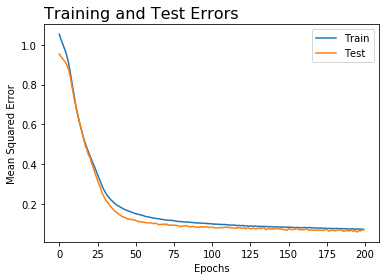

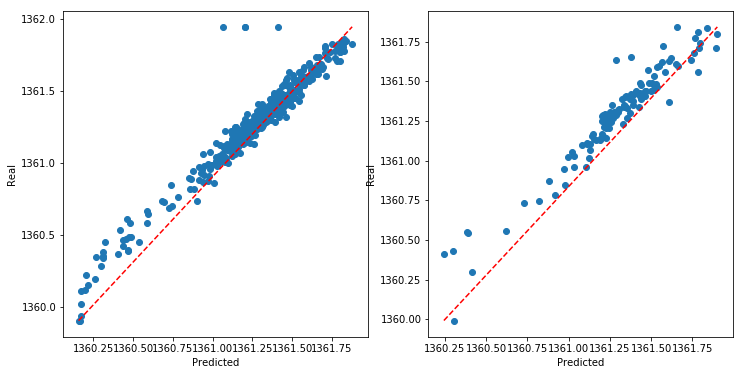

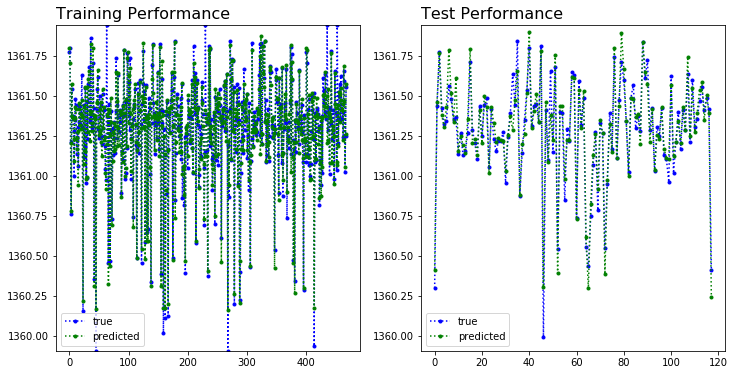

In [13]:
fig = plt.plot(fig_size=(12,6))
plt.plot(f.history['loss'], label='Train')
plt.plot(f.history['val_loss'], label='Test')
plt.title('Training and Test Errors', loc='left', fontsize=16)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

trainPredictedY = scaler.inverse_transform(trainPredictedY)
yTrain = scaler.inverse_transform(yTrain)
#plt.figure()
ax1.scatter(trainPredictedY,yTrain)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Real')
#plt.plot([-2,2],[-2,2])
ax1.plot([trainPredictedY.min(), trainPredictedY.max()], [yTrain.min(), yTrain.max()], color='red', 
         linestyle='--', label='optimal')

testPredictedY = scaler.inverse_transform(testPredictedY)
yTest = scaler.inverse_transform(yTest)
#plt.figure()
ax2.scatter(testPredictedY,yTest)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Real')
#plt.plot([-2,2],[-2,2])
ax2.plot([testPredictedY.min(), testPredictedY.max()], [yTest.min(), yTest.max()], color='red', 
         linestyle='--', label='optimal')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
#plt.figure()
ax1.plot(yTrain,'b.:',label='true')
ax1.plot(trainPredictedY,'g.:',label='predicted')
ax1.set_ylim((yTrain.min(),yTrain.max()))
ax1.set_title('Training Performance', loc='left', fontsize=16)
ax1.legend()

#plt.figure()
ax2.plot(yTest,'b.:',label='true')
ax2.plot(testPredictedY,'g.:',label='predicted')
ax2.set_ylim((yTrain.min(),yTrain.max()))
ax2.set_title('Test Performance', loc='left', fontsize=16)
ax2.legend()

#trainPredict = scaler.inverse_transform(trainPredict)
#yTrain = scaler.inverse_transform([yTrain])
#testPredict = scaler.inverse_transform(testPredict)
#yTest = scaler.inverse_transform([yTest])